# Libraries

In [37]:
import pickle
import os
import pandas as pd
import re # regex for cleaning the tweets
#import textblob as tb
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import altair as alt

# Data

In [39]:
CWD=os.getcwd()
FOLDER='New Twitter data'

In [40]:
df = pickle.load(open( os.path.join(CWD,FOLDER,'Twitter_Phrases.pkl'), "rb" ) )

In [41]:
df=df.drop(df.columns[[0,4]],axis = 1)

In [42]:
df

,label,year,original,Dominant
0,Electric,2015,#MyFord #Mobile Is a #SmartWatch #App Perfect ...,Topic 6
1,Electric,2015,#solar Exclusive Video On GM’s Electric Vehicl...,Topic 5
2,Electric,2015,@harbourtimes Hong Kong announcement - 2016 wo...,Topic 5
3,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5
4,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5
...,...,...,...,...
99480,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...,Topic 2
99481,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6
99482,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6
99483,Hybrid,2015,"To kick off 2015, we're looking at all the new...",Topic 1


In [43]:
# Cleaning the tweets
# Creating a function called clean. removing hyperlink, #, RT, @mentions
def clean(x):
 x = re.sub(r'^RT[\s]+', '', x)
 x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
 x = re.sub(r'#', '', x)
 x = re.sub(r'@[A-Za-z0–9]+', '', x) 
 return x
df['original'] = df['original'].apply(clean)
df

,label,year,original,Dominant
0,Electric,2015,MyFord Mobile Is a SmartWatch App Perfect for ...,Topic 6
1,Electric,2015,solar Exclusive Video On GM’s Electric Vehicle...,Topic 5
2,Electric,2015,Hong Kong announcement - 2016 world’s biggest...,Topic 5
3,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5
4,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5
...,...,...,...,...
99480,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...,Topic 2
99481,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6
99482,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6
99483,Hybrid,2015,"To kick off 2015, we're looking at all the new...",Topic 1


# Sentiment Analysis

In [44]:
analyser = SentimentIntensityAnalyzer()
compound = lambda x:analyser.polarity_scores(x).get('compound')
df['compound'] = df['original'].apply(compound)
df

,label,year,original,Dominant,compound
0,Electric,2015,MyFord Mobile Is a SmartWatch App Perfect for ...,Topic 6,0.5719
1,Electric,2015,solar Exclusive Video On GM’s Electric Vehicle...,Topic 5,0.1280
2,Electric,2015,Hong Kong announcement - 2016 world’s biggest...,Topic 5,0.0000
3,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5,0.1280
4,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5,0.1280
...,...,...,...,...,...
99480,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...,Topic 2,0.3818
99481,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6,0.4728
99482,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6,0.4728
99483,Hybrid,2015,"To kick off 2015, we're looking at all the new...",Topic 1,0.0000


In [45]:
def f(x):
    if x >= 0.05:
        d = 'positive'
    elif x<= -0.05:
        d = 'negative'
    else:
        d = 'neutral'
    return d
df['Sentiment'] = df['compound'].apply(f)
df

,label,year,original,Dominant,compound,Sentiment
0,Electric,2015,MyFord Mobile Is a SmartWatch App Perfect for ...,Topic 6,0.5719,positive
1,Electric,2015,solar Exclusive Video On GM’s Electric Vehicle...,Topic 5,0.1280,positive
2,Electric,2015,Hong Kong announcement - 2016 world’s biggest...,Topic 5,0.0000,neutral
3,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5,0.1280,positive
4,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5,0.1280,positive
...,...,...,...,...,...,...
99480,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...,Topic 2,0.3818,positive
99481,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6,0.4728,positive
99482,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6,0.4728,positive
99483,Hybrid,2015,"To kick off 2015, we're looking at all the new...",Topic 1,0.0000,neutral


# Plot

In [51]:
#df['Polarity'].value_counts()
SA = pd.DataFrame()
SA['Polarity'] = df.groupby(['Dominant', 'year'])['Sentiment'].value_counts().sort_index()

SA

Polarity
Dominant year Sentiment          
Topic 1  2015 negative        189
              neutral        1377
              positive        952
         2016 negative        188
              neutral        1889
...                           ...
Topic 9  2018 neutral         865
              positive        743
         2019 negative        242
              neutral         902
              positive        978

[135 rows x 1 columns]

In [95]:
df_neg = df[df['Sentiment'] == 'negative']
df_neu = df[df['Sentiment'] == 'neutral']
df_pos = df[df['Sentiment'] == 'positive']

df_neg = df_neg.drop(df_neg.columns[[0,2,4,5]],axis=1)
df_neu = df_neu.drop(df_neu.columns[[0,2,4,5]],axis=1)
df_pos = df_pos.drop(df_pos.columns[[0,2,4,5]],axis=1)

In [96]:
df_neg

,year,Dominant
24,2015,Topic 5
41,2015,Topic 8
49,2015,Topic 8
53,2015,Topic 8
86,2015,Topic 7
...,...,...
99411,2015,Topic 7
99412,2015,Topic 7
99415,2015,Topic 2
99441,2015,Topic 6


In [97]:
neg = pd.DataFrame()
neg['count'] = df_neg.groupby(['Dominant'])['year'].value_counts().sort_index()
neg.reset_index(inplace=True)
df1 = neg.pivot(index='Dominant', columns='year', values='count')

neu = pd.DataFrame()
neu['count'] = df_neu.groupby(['Dominant'])['year'].value_counts().sort_index()
neu.reset_index(inplace=True)
df2 = neu.pivot(index='Dominant', columns='year', values='count')

pos = pd.DataFrame()
pos['count'] = df_pos.groupby(['Dominant'])['year'].value_counts().sort_index()
pos.reset_index(inplace=True)
df3 = pos.pivot(index='Dominant', columns='year', values='count')

In [98]:
df1

year,2015,2016,2017,2018,2019
Dominant,,,,,
Topic 1,189,188,207,182,515
Topic 2,279,330,446,404,920
Topic 3,216,193,106,416,428
Topic 4,162,193,175,114,335
Topic 5,194,227,72,193,304
Topic 6,160,163,132,323,520
Topic 7,284,346,253,455,1294
Topic 8,193,189,82,271,289
Topic 9,299,516,115,206,242


In [99]:
df2

year,2015,2016,2017,2018,2019
Dominant,,,,,
Topic 1,1377,1889,1094,941,1416
Topic 2,1017,1001,731,718,1535
Topic 3,1280,2394,771,676,1244
Topic 4,1322,1919,1297,646,1852
Topic 5,982,1182,562,569,817
Topic 6,484,631,360,459,677
Topic 7,504,496,476,389,826
Topic 8,1012,1634,736,610,1125
Topic 9,1077,1047,661,865,902


In [100]:
df3

year,2015,2016,2017,2018,2019
Dominant,,,,,
Topic 1,952,1558,831,1151,1898
Topic 2,758,877,686,946,2089
Topic 3,524,1498,555,641,1309
Topic 4,571,734,802,517,1231
Topic 5,650,778,560,1109,1404
Topic 6,571,815,690,1009,1995
Topic 7,869,631,546,862,1973
Topic 8,764,709,404,625,1057
Topic 9,389,1024,679,743,978


In [101]:
total = pd.DataFrame()
total = df1 + df2 + df3

In [102]:
total

year,2015,2016,2017,2018,2019
Dominant,,,,,
Topic 1,2518,3635,2132,2274,3829
Topic 2,2054,2208,1863,2068,4544
Topic 3,2020,4085,1432,1733,2981
Topic 4,2055,2846,2274,1277,3418
Topic 5,1826,2187,1194,1871,2525
Topic 6,1215,1609,1182,1791,3192
Topic 7,1657,1473,1275,1706,4093
Topic 8,1969,2532,1222,1506,2471
Topic 9,1765,2587,1455,1814,2122


In [103]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Topic 1 to Topic 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2015    9 non-null      int64
 1   2016    9 non-null      int64
 2   2017    9 non-null      int64
 3   2018    9 non-null      int64
 4   2019    9 non-null      int64
dtypes: int64(5)
memory usage: 432.0+ bytes


In [104]:
df_1 = pd.DataFrame()
df_2 = pd.DataFrame()
df_3 = pd.DataFrame()
df_1 = df1*100/total
df_2 = df2*100/total
df_3 = df3*100/total

In [105]:
df_1

year,2015,2016,2017,2018,2019
Dominant,,,,,
Topic 1,7.505957,5.171939,9.709193,8.003518,13.449987
Topic 2,13.583252,14.945652,23.939882,19.535783,20.246479
Topic 3,10.693069,4.724602,7.402235,24.004616,14.357598
Topic 4,7.883212,6.781448,7.695690,8.927173,9.801053
Topic 5,10.624315,10.379515,6.030151,10.315339,12.039604
Topic 6,13.168724,10.130516,11.167513,18.034618,16.290727
Topic 7,17.139409,23.489477,19.843137,26.670574,31.614952
Topic 8,9.801930,7.464455,6.710311,17.994688,11.695670
Topic 9,16.940510,19.945883,7.903780,11.356119,11.404336


In [106]:
#df_2

In [107]:
#df_3

In [108]:
def prep_df(df, name):
    df = df.stack().reset_index()
    df.columns = ['c1', 'c2', 'values']
    df['Sentiment'] = name
    return df

df_1 = prep_df(df_1, 'negative')
df_2 = prep_df(df_2, 'neutral')
df_3 = prep_df(df_3, 'positive')

df_new = pd.concat([df_1, df_2, df_3])

In [109]:
df_new

,c1,c2,values,Sentiment
0,Topic 1,2015,7.505957,negative
1,Topic 1,2016,5.171939,negative
2,Topic 1,2017,9.709193,negative
3,Topic 1,2018,8.003518,negative
4,Topic 1,2019,13.449987,negative
...,...,...,...,...
40,Topic 9,2015,22.039660,positive
41,Topic 9,2016,39.582528,positive
42,Topic 9,2017,46.666667,positive
43,Topic 9,2018,40.959206,positive


In [110]:
yrange = (0,100)
alt.Chart(df_new).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('c2:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(values):Q',
        scale=alt.Scale(domain=yrange),
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('c1:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('Sentiment:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#96ceb4', '#ffcc5c','#ff6f69'],
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

In [111]:
df

,label,year,original,Dominant,compound,Sentiment
0,Electric,2015,MyFord Mobile Is a SmartWatch App Perfect for ...,Topic 6,0.5719,positive
1,Electric,2015,solar Exclusive Video On GM’s Electric Vehicle...,Topic 5,0.1280,positive
2,Electric,2015,Hong Kong announcement - 2016 world’s biggest...,Topic 5,0.0000,neutral
3,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5,0.1280,positive
4,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5,0.1280,positive
...,...,...,...,...,...,...
99480,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...,Topic 2,0.3818,positive
99481,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6,0.4728,positive
99482,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6,0.4728,positive
99483,Hybrid,2015,"To kick off 2015, we're looking at all the new...",Topic 1,0.0000,neutral


In [112]:
SAt = pd.DataFrame()
SAt['Polarity'] = df.groupby(['Dominant'])['Sentiment'].value_counts().sort_index()
SAt.reset_index(inplace=True)

SAt


,Dominant,Sentiment,Polarity
0,Topic 1,negative,1281
1,Topic 1,neutral,6717
2,Topic 1,positive,6390
3,Topic 2,negative,2379
4,Topic 2,neutral,5002
5,Topic 2,positive,5356
6,Topic 3,negative,1359
7,Topic 3,neutral,6365
8,Topic 3,positive,4527
9,Topic 4,negative,979


In [113]:
pivot_SAt = SAt.pivot(index='Dominant', columns='Sentiment', values='Polarity')

pivot_SAt['total'] = pivot_SAt['negative']+pivot_SAt['neutral']+pivot_SAt['positive']

pivot_SAt['negative'] = pivot_SAt['negative']*100/pivot_SAt['total']
pivot_SAt['neutral'] = pivot_SAt['neutral']*100/pivot_SAt['total']
pivot_SAt['positive'] = pivot_SAt['positive']*100/pivot_SAt['total']

pivot_SAt

Sentiment,negative,neutral,positive,total
Dominant,,,,
Topic 1,8.903253,46.684737,44.412010,14388
Topic 2,18.677868,39.271414,42.050718,12737
Topic 3,11.092972,51.954942,36.952086,12251
Topic 4,8.247683,59.275484,32.476832,11870
Topic 5,10.309278,42.819952,46.870770,9603
Topic 6,14.439871,29.046613,56.513517,8989
Topic 7,25.793806,26.372011,47.834183,10204
Topic 8,10.556701,52.752577,36.690722,9700
Topic 9,14.143488,46.720723,39.135790,9743


In [114]:
pivot_SAt=pivot_SAt.drop(pivot_SAt.columns[3], axis = 1)

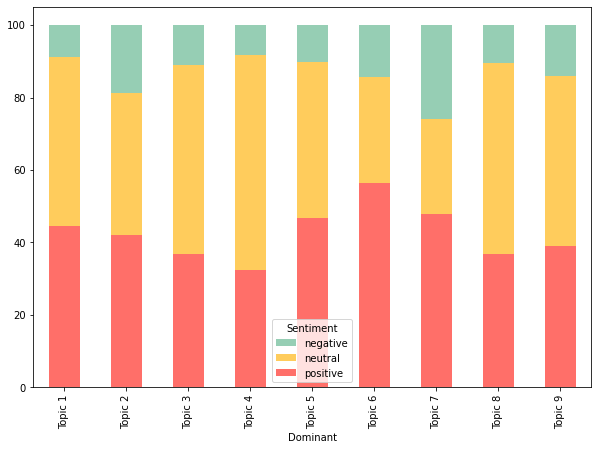

In [115]:
pivot_SAt

#colors = ["#006D2C", "#31A354","#74C476"]
colors = ['#ff6f69','#ffcc5c','#96ceb4']
ax = pivot_SAt.loc[:,['positive','neutral', 'negative']].plot.bar(stacked=True, color=colors, figsize=(10,7),
                                                             grid = False, legend = 'reverse')
#ax.set_axis_bgcolor('w') 

In [116]:
df

,label,year,original,Dominant,compound,Sentiment
0,Electric,2015,MyFord Mobile Is a SmartWatch App Perfect for ...,Topic 6,0.5719,positive
1,Electric,2015,solar Exclusive Video On GM’s Electric Vehicle...,Topic 5,0.1280,positive
2,Electric,2015,Hong Kong announcement - 2016 world’s biggest...,Topic 5,0.0000,neutral
3,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5,0.1280,positive
4,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5,0.1280,positive
...,...,...,...,...,...,...
99480,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...,Topic 2,0.3818,positive
99481,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6,0.4728,positive
99482,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6,0.4728,positive
99483,Hybrid,2015,"To kick off 2015, we're looking at all the new...",Topic 1,0.0000,neutral


In [117]:
dfe = df[df['label'] == 'Electric']

In [118]:
dfh = df[df['label'] == 'Hybrid']

In [119]:
dfe_neg = dfe[dfe['Sentiment'] == 'negative']
dfe_neu = dfe[dfe['Sentiment'] == 'neutral']
dfe_pos = dfe[dfe['Sentiment'] == 'positive']

dfe_neg = dfe_neg.drop(dfe_neg.columns[[0,2,4,5]],axis=1)
dfe_neu = dfe_neu.drop(dfe_neu.columns[[0,2,4,5]],axis=1)
dfe_pos = dfe_pos.drop(dfe_pos.columns[[0,2,4,5]],axis=1)

dfe_neg

nege = pd.DataFrame()
nege['count'] = dfe_neg.groupby(['Dominant'])['year'].value_counts().sort_index()
nege.reset_index(inplace=True)
df1e = nege.pivot(index='Dominant', columns='year', values='count')

neue = pd.DataFrame()
neue['count'] = dfe_neu.groupby(['Dominant'])['year'].value_counts().sort_index()
neue.reset_index(inplace=True)
df2e = neue.pivot(index='Dominant', columns='year', values='count')

pose = pd.DataFrame()
pose['count'] = dfe_pos.groupby(['Dominant'])['year'].value_counts().sort_index()
pose.reset_index(inplace=True)
df3e = pose.pivot(index='Dominant', columns='year', values='count')

totale = pd.DataFrame()
totale = df1e + df2e + df3e

In [120]:
totale

year,2015,2016,2017,2018,2019
Dominant,,,,,
Topic 1,925,1947,1025,885,2592
Topic 2,424,840,669,546,2631
Topic 3,1499,3528,1007,1249,2460
Topic 4,968,2003,1248,777,2625
Topic 5,812,1279,579,1025,1549
Topic 6,572,1097,636,867,2309
Topic 7,518,540,346,429,2561
Topic 8,653,1354,519,689,1792
Topic 9,765,1289,947,753,1584


In [121]:
df_1e = pd.DataFrame()
df_2e = pd.DataFrame()
df_3e = pd.DataFrame()
df_1e = df1e*100/totale
df_2e = df2e*100/totale
df_3e = df3e*100/totale

df_1e

#df_2

#df_3

def prep_df(df, name):
    df = df.stack().reset_index()
    df.columns = ['c1', 'c2', 'values']
    df['Sentiment'] = name
    return df

df_1e = prep_df(df_1e, 'negative')
df_2e = prep_df(df_2e, 'neutral')
df_3e = prep_df(df_3e, 'positive')

df_newe = pd.concat([df_1e, df_2e, df_3e])

df_newe

,c1,c2,values,Sentiment
0,Topic 1,2015,8.324324,negative
1,Topic 1,2016,4.622496,negative
2,Topic 1,2017,10.829268,negative
3,Topic 1,2018,9.378531,negative
4,Topic 1,2019,14.969136,negative
...,...,...,...,...
40,Topic 9,2015,29.803922,positive
41,Topic 9,2016,36.462374,positive
42,Topic 9,2017,54.910243,positive
43,Topic 9,2018,51.128818,positive


In [122]:
yrange = (0, 100)

alt.Chart(df_newe).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('c2:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(values):Q',
        scale=alt.Scale(domain=yrange),
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('c1:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('Sentiment:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#96ceb4', '#ffcc5c','#ff6f69'],
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )



alt.Chart(...)

In [124]:
dfh_neg = dfh[dfh['Sentiment'] == 'negative']
dfh_neu = dfh[dfh['Sentiment'] == 'neutral']
dfh_pos = dfh[dfh['Sentiment'] == 'positive']

dfh_neg = dfh_neg.drop(dfh_neg.columns[[0,2,4,5]],axis=1)
dfh_neu = dfh_neu.drop(dfh_neu.columns[[0,2,4,5]],axis=1)
dfh_pos = dfh_pos.drop(dfh_pos.columns[[0,2,4,5]],axis=1)

dfh_neg

negh = pd.DataFrame()
negh['count'] = dfh_neg.groupby(['Dominant'])['year'].value_counts().sort_index()
negh.reset_index(inplace=True)
df1h = negh.pivot(index='Dominant', columns='year', values='count')

neuh = pd.DataFrame()
neuh['count'] = dfh_neu.groupby(['Dominant'])['year'].value_counts().sort_index()
neuh.reset_index(inplace=True)
df2h = neuh.pivot(index='Dominant', columns='year', values='count')

posh = pd.DataFrame()
posh['count'] = dfh_pos.groupby(['Dominant'])['year'].value_counts().sort_index()
posh.reset_index(inplace=True)
df3h = posh.pivot(index='Dominant', columns='year', values='count')

totalh = pd.DataFrame()
totalh = df1h + df2h + df3h

totalh

df_1h = pd.DataFrame()
df_2h = pd.DataFrame()
df_3h = pd.DataFrame()
df_1h = df1h*100/totalh
df_2h = df2h*100/totalh
df_3h = df3h*100/totalh

df_1h

#df_2

#df_3

def prep_df(df, name):
    df = df.stack().reset_index()
    df.columns = ['c1', 'c2', 'values']
    df['Sentiment'] = name
    return df

df_1h = prep_df(df_1h, 'negative')
df_2h = prep_df(df_2h, 'neutral')
df_3h = prep_df(df_3h, 'positive')

df_newh = pd.concat([df_1h, df_2h, df_3h])

df_newh

yrange = (0, 100)
alt.Chart(df_newh).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('c2:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(values):Q',
        scale=alt.Scale(domain=yrange),
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('c1:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('Sentiment:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#96ceb4', '#ffcc5c','#ff6f69'],
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )





alt.Chart(...)

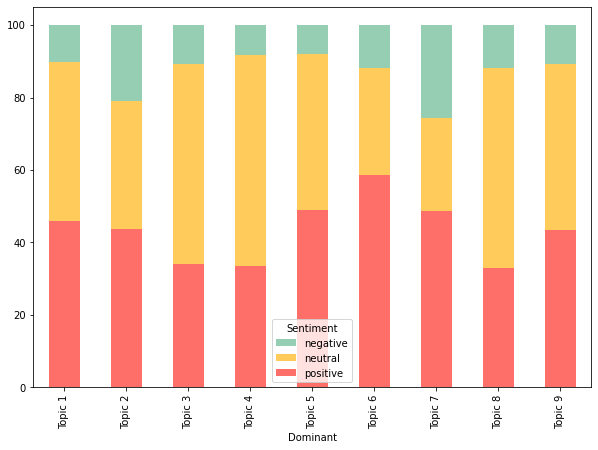

In [85]:
SAte = pd.DataFrame()
SAte['Polarity'] = dfe.groupby(['Dominant'])['Sentiment'].value_counts().sort_index()
SAte.reset_index(inplace=True)



pivot_SAte = SAte.pivot(index='Dominant', columns='Sentiment', values='Polarity')

pivot_SAte['total'] = pivot_SAte['negative']+pivot_SAte['neutral']+pivot_SAte['positive']

pivot_SAte['negative'] = pivot_SAte['negative']*100/pivot_SAte['total']
pivot_SAte['neutral'] = pivot_SAte['neutral']*100/pivot_SAte['total']
pivot_SAte['positive'] = pivot_SAte['positive']*100/pivot_SAte['total']


pivot_SAte=pivot_SAte.drop(pivot_SAte.columns[3], axis = 1)



#colors = ["#006D2C", "#31A354","#74C476"]
colors = ['#ff6f69','#ffcc5c','#96ceb4']
pivot_SAte.loc[:,['positive','neutral', 'negative']].plot.bar(stacked=True, color=colors, figsize=(10,7),
                                                              grid = False, legend = 'reverse')

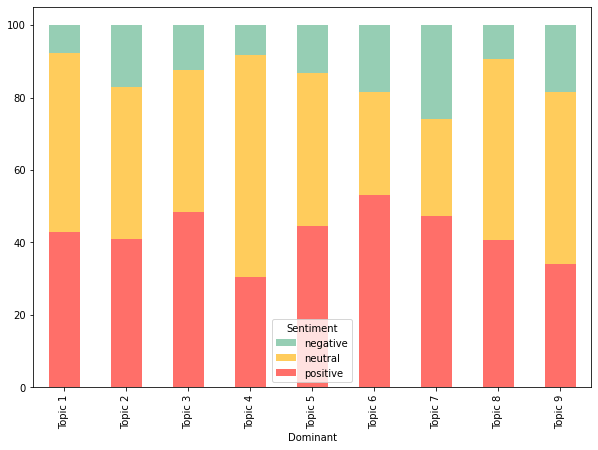

In [88]:
SAth = pd.DataFrame()
SAth['Polarity'] = dfh.groupby(['Dominant'])['Sentiment'].value_counts().sort_index()
SAth.reset_index(inplace=True)



pivot_SAth = SAth.pivot(index='Dominant', columns='Sentiment', values='Polarity')

pivot_SAth['total'] = pivot_SAth['negative']+pivot_SAth['neutral']+pivot_SAth['positive']

pivot_SAth['negative'] = pivot_SAth['negative']*100/pivot_SAth['total']
pivot_SAth['neutral'] = pivot_SAth['neutral']*100/pivot_SAth['total']
pivot_SAth['positive'] = pivot_SAth['positive']*100/pivot_SAth['total']


pivot_SAth=pivot_SAth.drop(pivot_SAth.columns[3], axis = 1)



#colors = ["#006D2C", "#31A354","#74C476"]
colors = ['#ff6f69','#ffcc5c','#96ceb4']
pivot_SAth.loc[:,['positive','neutral', 'negative']].plot.bar(stacked=True, color=colors, figsize=(10,7),
                                                              grid = False, legend = 'reverse')